In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import altair as alt

import bootcamp_utils

In [2]:
np.random.random(size=10)

array([0.907607  , 0.22252115, 0.58659688, 0.42403472, 0.16480359,
       0.45745536, 0.2422526 , 0.5691896 , 0.32755142, 0.23471306])

In [3]:
x = np.random.random(size=100000)

x, y = bootcamp_utils.ecdf_vals(x)


x[:10], y[:10]

(array([1.38573261e-06, 1.20813905e-05, 2.56677902e-05, 4.04557822e-05,
        5.04654293e-05, 5.24997164e-05, 5.68923852e-05, 5.88015407e-05,
        6.09067820e-05, 8.22273420e-05]),
 array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
        9.e-05, 1.e-04]))

In [5]:
x = np.random.random(size=100000)

x, y = bootcamp_utils.ecdf_vals(x)

df_ecdf = pd.DataFrame(data={'x': x,
                             'y': y})

df_ecdf.shape

(100000, 2)

In [6]:
x = np.random.random(size=100000)

x, y = bootcamp_utils.ecdf_vals(x)

df_ecdf = pd.DataFrame(data={'x': x[::1000],
                             'y': y[::1000]})

df_ecdf.shape

(100, 2)

In [8]:
x = np.random.random(size=100000)

x, y = bootcamp_utils.ecdf_vals(x)

df_ecdf = pd.DataFrame(data={'x': x[::1000],
                             'y': y[::1000]})

df_cdf = pd.DataFrame(data={'x': [0,1],
                             'y': [0,1]})

df_ecdf.shape

(100, 2)

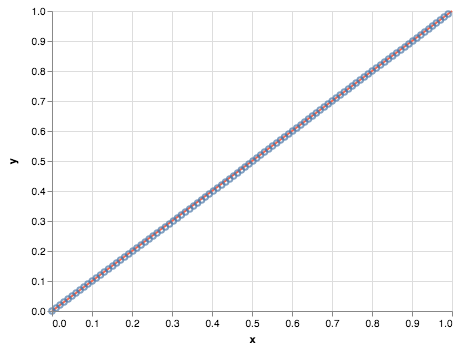

In [17]:
p_ecdf = alt.Chart(df_ecdf
            ).mark_point(
            ).encode(
                x='x:Q',
                y='y:Q'
            )

p_cdf = alt.Chart(df_cdf
            ).mark_line(
                color='tomato',
            ).encode(
                x='x:Q',
                y='y:Q'
            )

p_cdf + p_ecdf

In [36]:
x = np.random.random(size=20)

# let's make them into coin flips
heads = x > 0.5

x, heads

print(heads)
print('There were ', np.sum(heads), ' heads.')

[False  True  True  True  True  True False False False  True False False
  True  True False  True  True  True False  True]
There were  12  heads.


In [45]:
# seed is a place where the numbers are ordered, and if you define which seed to pull your random numbers from, you will get the same results
# seeding is useful for testing procedures, because if you want to make sure your changes are good, you might want to take from the same random number set again to recreate the exact values
# WARNING - never assign the same seed if you in fact want random numbers each time
np.random.seed(42)

x = np.random.random(size=20)

# let's make them into coin flips
heads = x > 0.5

x, heads

print(heads)
print('There were ', np.sum(heads), ' heads.')

[False  True  True  True False False False  True  True  True False  True
  True False False False False  True False False]
There were  9  heads.


In [ ]:
mu = 10
sigma = 1

# select random numbers from a normal distribution
x = np.random.normal(mu, sigma, size=100000)

np.histogram(x, density=True)

In [48]:
np.histogram?

Signature: np.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines the bin edges, including the rightmost
    edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string from the list below, `histogram` will use
    the method chosen to calculate the optimal bin width and
    consequently the number of bins (see `Notes` for more detail on
    the estimators) from the data that falls within the requested
    range. While the bin width will be optimal for the actual data
    in the range, the number of bins will be computed to fill the
    entire range, including the empty por

In [49]:
mu = 10
sigma = 1

# select random numbers from a normal distribution
x = np.random.normal(mu, sigma, size=100000)

# we know np.histogram will return two things, so we'll assign them as a tuple at hist and bin_edges
hist, bin_edges = np.histogram(x, density=True, bins=50)
bin_centers = np.diff(bin_edges)/2 + bin_edges[:-1]

print(bin_edges)
print(np.diff(bin_edges)/2)
print(bin_edges[:-1])
print(bin_centers)


[ 5.53439614  5.7132899   5.89218366  6.07107742  6.24997119  6.42886495
  6.60775871  6.78665247  6.96554623  7.14444     7.32333376  7.50222752
  7.68112128  7.86001505  8.03890881  8.21780257  8.39669633  8.5755901
  8.75448386  8.93337762  9.11227138  9.29116514  9.47005891  9.64895267
  9.82784643 10.00674019 10.18563396 10.36452772 10.54342148 10.72231524
 10.90120901 11.08010277 11.25899653 11.43789029 11.61678405 11.79567782
 11.97457158 12.15346534 12.3323591  12.51125287 12.69014663 12.86904039
 13.04793415 13.22682791 13.40572168 13.58461544 13.7635092  13.94240296
 14.12129673 14.30019049 14.47908425]
[0.08944688 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688
 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688
 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688
 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688
 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688 0.08944688
 0.08944688 0.08944688 0.08944688 0.08944688

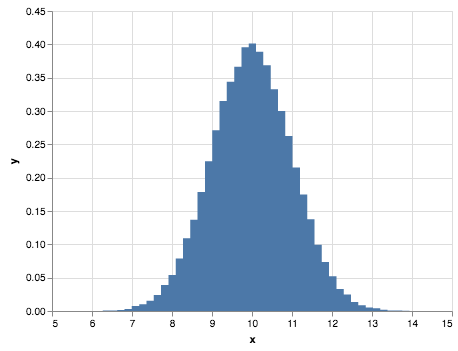

In [54]:
mu = 10
sigma = 1

# select random numbers from a normal distribution
x = np.random.normal(mu, sigma, size=100000)

# we know np.histogram will return two things, so we'll assign them as a tuple at hist and bin_edges
hist, bin_edges = np.histogram(x, density=True, bins=50)
bin_centers = np.diff(bin_edges)/2 + bin_edges[:-1]

df = pd.DataFrame(data={'x': bin_centers, 'y': hist})

alt.Chart(df
    ).mark_area(interpolate='step'
    ).encode(
        x='x:Q',
        y='y:Q'
    )

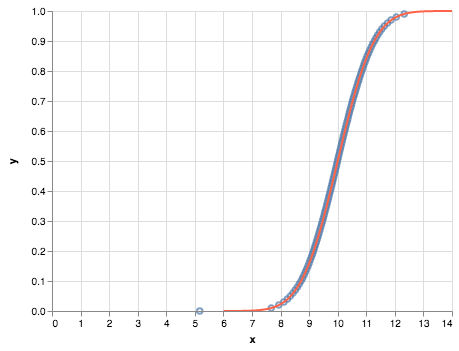

In [64]:
x_theor = np.linspace(6, 14, 400)
y_theor = scipy.stats.norm.cdf(x_theor, mu, sigma)

df_cdf = pd.DataFrame(data={'x': x_theor,
                            'y': y_theor})

x, y = bootcamp_utils.ecdf_vals(x)

df_ecdf = pd.DataFrame(data={'x': x[::1000],
                             'y': y[::1000]})

p_ecdf = alt.Chart(df_ecdf
                ).mark_point(
                ).encode(
                    x='x:Q',
                    y='y:Q'
                )

p_cdf = alt.Chart(df_cdf
                ).mark_line(
                    color='tomato'
                ).encode(
                    x='x:Q',
                    y='y:Q'
                )

p_ecdf + p_cdf

In [73]:
np.random.binomial(10, 0.5)

3

In [ ]:
(AAAAHHHH [THIS] IS {AWESOME!!})

In [75]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.choice(names, size=3, replace=False)

array(['Guido', 'Mike', 'Julie'], dtype='<U6')

In [76]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.choice(names, size=3, replace=False)

array(['Guido', 'Mike', 'Susie'], dtype='<U6')

In [77]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.choice(names, size=3, replace=False)

array(['Guido', 'Susie', 'Julie'], dtype='<U6')

In [78]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.seed(42)
np.random.choice(names, size=3, replace=False)

array(['Max', 'Joe', 'Julie'], dtype='<U6')

In [79]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.seed(42)
np.random.choice(names, size=3, replace=False)

array(['Max', 'Joe', 'Julie'], dtype='<U6')

In [80]:
names = ['Max', 'Joe', 'Mike', 'Guido', 'Susie', 'Julie', 'Lebron']

np.random.seed(42)
np.random.choice(names, size=3, replace=False)

array(['Max', 'Joe', 'Julie'], dtype='<U6')

In [82]:
bases = ['A', 'T', 'G', 'C']

"".join(np.random.choice(bases, replace=True, size=70))

'AAGTGGGGCACCCGTATCCTTTCCAACTTACAAGGGTCCCCGTTGTGCGCCAGAGGAAGTCACTTTATAT'